# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1: Mateo Podestá
- Integrante 2: Marco Gregorio

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

### NLP

#### Primer caso: Twitter Financial News

Usaremos Twitter Financial News, extraido de Kaggle. El databse a emplear se encuentra en el repo. Este análisis crucial debido a la influencia creciente de las redes sociales en las decisiones financieras. La plataforma es vital para la difusión instantánea de noticias, y el NLP permite extraer insights valiosos al analizar grandes cantidades de texto, identificando tendencias, evaluando el sentimiento del mercado y anticipando movimientos financieros. Esta metodología agiliza la obtención de información clave, facilitando decisiones informadas en el ámbito financiero y proporcionando a los inversores una ventaja competitiva.

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [60]:
#usaremos el train data
finance_df = pd.read_csv("train_data.csv")
print(f"Shape of data: {finance_df.shape}")
print(f"Columns in data: {finance_df.columns}")
print("The dataset holds documents annotated with 20 labels: LABEL_0: Analyst Update, LABEL_1: Fed | Central Banks, LABEL_2: Company | Product News, LABEL_3: Treasuries | Corporate Debt, LABEL_4: Dividend, LABEL_5: Earnings, LABEL_6: Energy | Oil, LABEL_7: Financials, LABEL_8: Currencies, LABEL_9: General News | Opinion, LABEL_10: Gold | Metals | Materials, LABEL_11: IPO, LABEL_12: Legal | Regulation, LABEL_13: M&A | Investments, LABEL_14: Macro, LABEL_15: Markets, LABEL_16: Politics, LABEL_17: Personnel Change, LABEL_18: Stock Commentary, LABEL_19: Stock Movement")

Shape of data: (16990, 2)
Columns in data: Index(['text', 'label'], dtype='object')
The dataset holds documents annotated with 20 labels: LABEL_0: Analyst Update, LABEL_1: Fed | Central Banks, LABEL_2: Company | Product News, LABEL_3: Treasuries | Corporate Debt, LABEL_4: Dividend, LABEL_5: Earnings, LABEL_6: Energy | Oil, LABEL_7: Financials, LABEL_8: Currencies, LABEL_9: General News | Opinion, LABEL_10: Gold | Metals | Materials, LABEL_11: IPO, LABEL_12: Legal | Regulation, LABEL_13: M&A | Investments, LABEL_14: Macro, LABEL_15: Markets, LABEL_16: Politics, LABEL_17: Personnel Change, LABEL_18: Stock Commentary, LABEL_19: Stock Movement


Análisis exploratorio y Sampling

In [61]:
finance_df.dtypes

text     object
label     int64
dtype: object

In [62]:
finance_df.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


In [63]:
finance_sample = finance_df.sample(frac=0.3, random_state=100)
print(f'Shape of sample: {finance_sample.shape}')

Shape of sample: (5097, 2)


In [64]:
finance_sample.head()

,text,label
6559,Richmond Fed President Thomas Barkin kept his ...,1
3875,Sterling stabilises vs dollar and euro as UK i...,8
12994,Mexican President Lopez Obrador will use his W...,16
12322,Alterna Equity Partners’ Robert Konrad Selecte...,17
10551,U.S. retail sales climb 1% in June — but highe...,14


<Axes: xlabel='label', ylabel='count'>

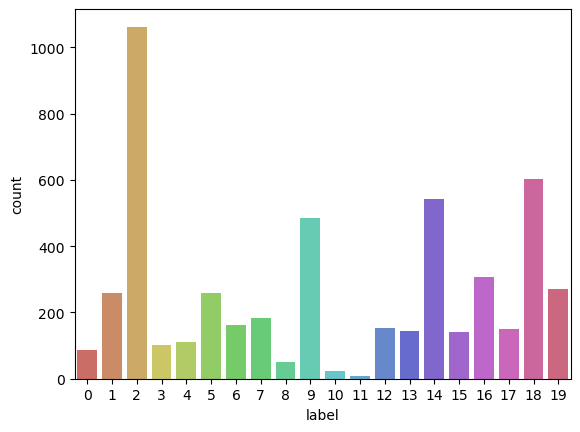

In [65]:
#Conteo de targets
sns.countplot(x = finance_sample['label'], data=finance_sample, palette='hls')

Preprocesamiento de texto

In [66]:
with pd.option_context('mode.chained_assignment', None): #esta primera linea de texto está tomada de stack overflow: me daba un warning que era muy molesto
  for index, row in finance_sample.iterrows():
    finance_sample['text'][index] = re.sub('http://\S+|https://\S+', '', finance_sample['text'][index]) #eliminamos los links

finance_sample['text'] = finance_sample['text'].str.lower() #convertimos a minusculas

import re
def punctuation(inputs):
    return re.sub(r'[^A-Za-z\s]', ' ', inputs) #hemos notado que las palabras más comunes eran números del 0 al 9. decidimos quitarlos

finance_sample['text'] = finance_sample['text'].apply(punctuation) #eliminamos los caracteres especiales

finance_sample.head()

,text,label
6559,richmond fed president thomas barkin kept his ...,1
3875,sterling stabilises vs dollar and euro as uk i...,8
12994,mexican president lopez obrador will use his w...,16
12322,alterna equity partners robert konrad selecte...,17
10551,u s retail sales climb in june but highe...,14


In [67]:
finance_sample.head()

,text,label
6559,richmond fed president thomas barkin kept his ...,1
3875,sterling stabilises vs dollar and euro as uk i...,8
12994,mexican president lopez obrador will use his w...,16
12322,alterna equity partners robert konrad selecte...,17
10551,u s retail sales climb in june but highe...,14


In [68]:
#tokenizamos:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(inputs):
    return word_tokenize(inputs)

finance_sample['text_tokenized'] = finance_sample['text'].apply(tokenization)
finance_sample['text_tokenized'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


6559     [richmond, fed, president, thomas, barkin, kep...
3875     [sterling, stabilises, vs, dollar, and, euro, ...
12994    [mexican, president, lopez, obrador, will, use...
12322    [alterna, equity, partners, robert, konrad, se...
10551    [u, s, retail, sales, climb, in, june, but, hi...
Name: text_tokenized, dtype: object

In [69]:
# Aplicamos las stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.add(',') #también añadimos estos carácteres
stop_words.add('.')
stop_words.add('“')
stop_words.add('’')


def stopwords_remove(inputs):
    return [word for word in inputs if word not in stop_words]

finance_sample['text_stop'] = finance_sample['text_tokenized'].apply(stopwords_remove)
finance_sample['text_stop'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6559     [richmond, fed, president, thomas, barkin, kep...
3875     [sterling, stabilises, vs, dollar, euro, uk, i...
12994    [mexican, president, lopez, obrador, use, whit...
12322    [alterna, equity, partners, robert, konrad, se...
10551    [u, retail, sales, climb, june, higher, prices...
Name: text_stop, dtype: object

In [70]:
# Lemmatización
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
exceptions = ["fed"] # hemos notado que el lemmatizer interpreta a FED (del banco de federal) como feed. No queremos eso

def custom_lemmatizer(word):
 if word.lower() in exceptions:
  return word
 else:
  return lemmatizer.lemmatize(word, pos='v')

def lemmatization(inputs):
 return [custom_lemmatizer(word=word) for word in inputs]

finance_sample['text_lemmatized'] = finance_sample['text_stop'].apply(lemmatization)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [71]:
finance_sample.head()

,text,label,text_tokenized,text_stop,text_lemmatized
6559,richmond fed president thomas barkin kept his ...,1,"[richmond, fed, president, thomas, barkin, kep...","[richmond, fed, president, thomas, barkin, kep...","[richmond, fed, president, thomas, barkin, kee..."
3875,sterling stabilises vs dollar and euro as uk i...,8,"[sterling, stabilises, vs, dollar, and, euro, ...","[sterling, stabilises, vs, dollar, euro, uk, i...","[sterling, stabilise, vs, dollar, euro, uk, in..."
12994,mexican president lopez obrador will use his w...,16,"[mexican, president, lopez, obrador, will, use...","[mexican, president, lopez, obrador, use, whit...","[mexican, president, lopez, obrador, use, whit..."
12322,alterna equity partners robert konrad selecte...,17,"[alterna, equity, partners, robert, konrad, se...","[alterna, equity, partners, robert, konrad, se...","[alterna, equity, partner, robert, konrad, sel..."
10551,u s retail sales climb in june but highe...,14,"[u, s, retail, sales, climb, in, june, but, hi...","[u, retail, sales, climb, june, higher, prices...","[u, retail, sales, climb, june, higher, price,..."


Visualization

In [72]:
#50 palabras mas comunes en todas las noticias
#Prefiero usar treemaps, me parece una gráfico más intuitivo y amigable
import plotly.express as px

finance_sample['final'] = finance_sample['text_lemmatized'].str.join(' ')

freq_words = finance_sample['final'].str.split(expand=True).stack().value_counts()
freq_words_top50 = freq_words[:50]


fig = px.treemap(freq_words_top50, path=[freq_words_top50.index], values=freq_words_top50.values)
fig.update_layout(title_text='Las 50 palabras más usadas en Twitter Financial News', title_font=dict(size=20))
fig.show()

In [73]:
#50 palabras mas comunes en noticias sobre los bancos centrales
import plotly.express as px

finance_sample_cb = finance_sample[finance_sample['label']==1]

freq_words_cb = finance_sample_cb['final'].str.split(expand=True).stack().value_counts()
freq_words_top50_cb = freq_words_cb[:50]


fig = px.treemap(freq_words_top50_cb, path=[freq_words_top50_cb.index], values=freq_words_top50_cb.values)
fig.update_layout(title_text='Las 50 palabras más usadas en Twitter Financial News (Bancos Centrales)', title_font=dict(size=20))
fig.show()

In [74]:
#50 palabras mas comunes en noticias sobre comentarios de acciones
import plotly.express as px

finance_sample_sc = finance_sample[finance_sample['label']==18]

freq_words_sc = finance_sample_sc['final'].str.split(expand=True).stack().value_counts()
freq_words_top50_sc = freq_words_sc[:50]


fig = px.treemap(freq_words_top50_sc, path=[freq_words_top50_sc.index], values=freq_words_top50_sc.values)
fig.update_layout(title_text='Las 50 palabras más usadas en Twitter Financial News (Comentario sobre acciones)', title_font=dict(size=15))
fig.show()

Observamos que las noticias relacionadas con las acciones ejecutadas por los bancos centrales tienden a centrarse predominantemente en instituciones y variables macroeconómicas. Esto se refleja en el uso recurrente de términos como "fed" (Reserva Federal), "bank" (banco), "inflation" (inflación), "rate" (tasa) y "central" (central). En constraste, las noticias relacionadas con acciones se orientan más hacia el movimiento individual de ciertos valores y el estado general del mercado financiero. Esta inclinación se hace patente en la frecuente utilización de palabras como "stock" (acción), "market" (mercado), "economy" (economía), "invest" (invertir) y "buy" (comprar), entre otros.

#### Segundo Caso: Notas informativas del BCRP

La capacidad de NLP para extraer información clave de las notas del BCRP, monitorear cambios en la política monetaria, construir modelos predictivos y analizar el sentimiento expresado en los comunicados, ofrece a analistas, inversores y responsables de políticas una herramienta valiosa para anticipar movimientos económicos, comprender la perspectiva del banco central y automatizar tareas rutinarias, optimizando así la toma de decisiones estratégicas.

In [75]:
#usaremos PyPDF2: pip install PyPDF2
import PyPDF2 as pdf

In [76]:
d_nota_1 = open('some_example_data\ota-informativa-2023-01-12-1.pdf', mode='rb')
d_nota_2 = open('some_example_data\ota-informativa-2023-11-09.pdf', mode='rb')
d_nota_3 = open('some_example_data\ota-informativa-2024-01-11.pdf', mode='rb')

In [77]:
pdf_nota_1 = pdf.PdfReader(d_nota_1)
print(len(pdf_nota_1.pages))

nota_1_page = pdf_nota_1.pages[-1]
nota_1 = nota_1_page.extract_text()
print(nota_1)

1
NOTA INFORMATIVA  
 
PROGRAMA  MONETARIO  DE ENERO  2023  
BCRP ELEVA  LA TASA  DE INTERÉS  DE REFERENCIA  A 7,75% 
 
1. El Directorio del Banco Central de Reserva del Perú acordó elevar la tasa de interés de referencia 
en 25 pbs. a 7,75 por ciento, continuando con los ajustes de la posición de política monetaria. Para 
esta decisión se consideró la siguiente información : 
i. La tasa de inflación a doce meses aumentó de 8,45 por ciento en noviembre a 8,46 por ciento 
en diciembre, por mayores precios de alimentos producidos localmente, mientras que la tasa 
de inflación sin alimentos y energía a doce meses se redujo de 5,71 por cien to en noviembre 
a 5,59 por ciento en diciembre. Ambos indicadores se ubicaron por encima del límite superior 
del rango meta de inflación.  
ii. El aumento significativo de los precios internacionales de energía y alimentos desde la 
segunda mitad de 2021, acentua do por los conflictos internacionales, ha conllevado a un 
fuerte incremento de las tasas

In [78]:
pdf_nota_2 = pdf.PdfReader(d_nota_2)
print(len(pdf_nota_2.pages))

nota_2_page = pdf_nota_2.pages[-1]
nota_2 = nota_2_page.extract_text()
print(nota_2)

1
NOTA INFORMATIVA 
 
PROGRAMA MONETARIO  DE NOVIEMBRE  2023  
BCRP REDUJO  LA TASA DE INTERÉS  DE REFERENCIA A 7,00%  
 
1. El Directorio del Banco Central de Reserva del Perú acordó reducir la tasa de interés de referencia en 25 
pbs. a 7,00 por ciento. Esta decisión no necesariamente implica un ciclo de sucesivas reducciones en la tasa 
de interés. Futuros ajustes en la tasa de  referencia estarán condicionados a la nueva información sobre la 
inflación y sus determinantes.  
 
2. La decisión de reducir la tasa de referencia tomó en cuenta la siguiente información y proyecciones:  
 
i. En octubre la tasa mensual de inflación fue - 0,32 por ciento y la inflación sin alimentos y energía fue 
0,22 por ciento. La tasa de inflación a doce meses se redujo de 5,0 por ciento en setiembre a 4,3 por 
ciento en octubre, mientras que la tasa de inflaci ón sin alimentos y energía a doce meses disminuyó 
de 3,6 por ciento en setiembre a 3,3 por ciento en octubre. Ambos indicadores vienen disminu

In [79]:
pdf_nota_3 = pdf.PdfReader(d_nota_3)
print(len(pdf_nota_3.pages))

nota_3_page = pdf_nota_3.pages[-1]
nota_3 = nota_3_page.extract_text()
print(nota_3)

1
NOTA INFORMATIVA 
 
PROGRAMA MONETARIO  DE ENERO  2024  
BCRP REDUJO  LA TASA DE INTERÉS  DE REFERENCIA A 6,50%  
 
1. El Directorio del Banco Central de Reserva del Perú (BCRP) acordó reducir la tasa de interés de referencia 
en 25 puntos básicos a 6,50 por ciento. Esta decisión no necesariamente implica un ciclo de reducciones 
sucesivas en la tasa de interés. Los futuros ajustes en la tasa de referencia estarán condicionados a la nueva 
información sobre la inflación y sus determinantes .  
 
2. La decisión de reducir la tasa de referencia tomó en cuenta la información y las proyecciones siguientes : 
 
i. En diciembre la tasa mensual de inflación fue 0,41 por ciento y la inflación sin alimentos y energía fue 
0,36 por ciento. La tasa de inflación a doce meses se redujo de 3,6 por ciento en noviembre a 3,2 por 
ciento en diciembre , mientras que la tasa de inflación sin alimentos y energía a doce meses disminuyó 
de 3,1 por ciento en noviembre a 2,9 por ciento en diciembre. Ambos 

In [93]:
notas = nota_1 + nota_2 + nota_3 #unimos las 3 notas

Aplicación del modelo: usaremos tf-idf (código adaptado de video de youtube)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tokenizamos
notas_tokenizado = word_tokenize(notas, language='spanish')

# TF_IDF:
tfidf = ' '.join(notas_tokenizado)

vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"))
tfidf_matrix = vectorizer.fit_transform([tfidf])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().flatten()

# diccionario con los resultados
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Resultados: Código adaptado de chatgpt :(
print("TF-IDF Scores:")
for term, score in sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{term}: {score}")

TF-IDF Scores:
inflación: 0.4616953179031328
ciento: 0.3153041195436029
operaciones: 0.27026067389451675
tasa: 0.25899981248224524
meses: 0.1801737825963445
directorio: 0.16891292118407297
interés: 0.15765205977180144
meta: 0.13513033694725837
rango: 0.13513033694725837
diciembre: 0.12386947553498684
expectativas: 0.12386947553498684
alimentos: 0.1126086141227153
referencia: 0.1126086141227153
2023: 0.10134775271044379
doce: 0.10134775271044379
ii: 0.10134775271044379
tasas: 0.10134775271044379
actividad: 0.09008689129817225
económica: 0.09008689129817225
energía: 0.09008689129817225
información: 0.09008689129817225
internacionales: 0.09008689129817225
monetaria: 0.09008689129817225
noviembre: 0.09008689129817225
bcrp: 0.07882602988590072
10: 0.06756516847362919
25: 0.06756516847362919
acordó: 0.06756516847362919
adicionales: 0.06756516847362919
anual: 0.06756516847362919
cambiarias: 0.06756516847362919
comité: 0.06756516847362919
conflictos: 0.06756516847362919
indicadores: 0.06756516

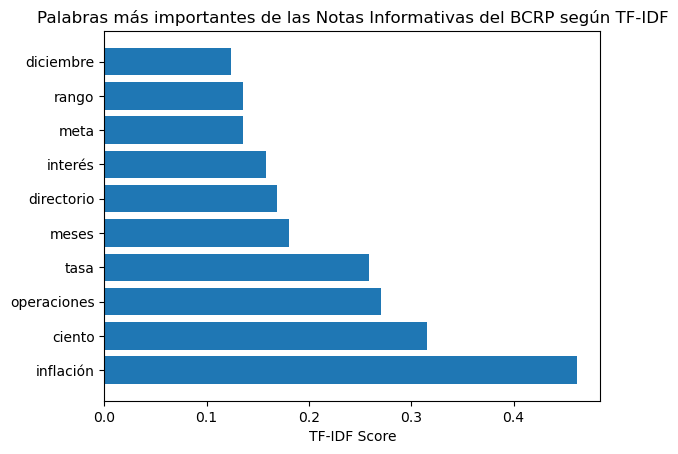

In [101]:
#Graficamos
top_n = 10
tfidf_ordenado = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Extraemos los resultados para graficarlos
terms, scores = zip(*tfidf_ordenado)

#Ploteamos

plt.barh(range(len(terms)), scores, align='center')
plt.yticks(range(len(terms)), terms)
plt.xlabel('TF-IDF Score')
plt.title('Palabras más importantes de las Notas Informativas del BCRP según TF-IDF')
plt.show()

Observamos que, de acuerdo con el método TF-IDF, las palabras más significativas en las tres notas informativas del BCRP son "inflación", "ciento", "operaciones", "tasa" y "meses", entre otros. Este hallazgo confirma nuestras sospechas previas: las notas del programa monetario se centran principalmente en comunicar sobre la inflación actual, expectativas de inflación, así como en las medidas monetarias que se planea implementar.